# importing modules

In [1]:
import pandas as pd
import nltk
from tqdm.auto import tqdm
import tensorflow as tf
from transformers import BertTokenizer


# loading the Dataset

In [2]:
df = pd.read_csv('input_data (1).csv')

# cleaning the dataset

In [3]:
df.columns.values[1]='sms'
df.columns.values[5]='bucket'

In [4]:
df.drop([0,1,2,3,4],inplace=True)

In [5]:
df.describe()

,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.sample(5)

,Unnamed: 0,sms,Unnamed: 2,Unnamed: 3,Unnamed: 4,bucket,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
165,03/06/21,UPI-SATHISH KUMAR S-JOSEPHSATHISH1982@OKHDFCBA...,03/06/21,2000,NaN,utility,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,20/04/21,NWD-435584XXXXXX8149-S1AG0791-CHENNAI,20/04/21,400,NaN,cash w,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,08/04/21,UPI-RAZORPAYZOMATO-ZOMATOINDIA@ICICI-ICIC00000...,08/04/21,237.2,NaN,online food,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,09/06/21,UPI-ZOMATO-ZOMATO-ORDER@PAYTM-PYTM0123456-1160...,09/06/21,128.21,NaN,online food,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,04/04/21,UPI-GOOGLEPAY-GOOG-PAYMENT@OKAXIS-UTIB0000553-...,04/04/21,NaN,5,utility,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.head(10)

,Unnamed: 0,sms,Unnamed: 2,Unnamed: 3,Unnamed: 4,bucket,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
5,01/04/21,UPI-K RAJESH-RAJESHDPMINDIA@OKICICI-ICIC000000...,01/04/21,1,NaN,utility,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,01/04/21,"NEFT DR-PUNB0668200-ROHAN-NETBANK, MUM-N091211...",01/04/21,17816,NaN,funds,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,01/04/21,UPI-K RAJESH-RAJESHDPMINDIA@OKICICI-ICIC000000...,01/04/21,24999,NaN,utility,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,01/04/21,UPI-ZOMATO-ZOMATO-ORDER@PAYTM-PYTM0123456-1091...,01/04/21,111.18,NaN,online food,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,02/04/21,UPI-MAHENDRAN K M-SRIMURUGANSUPERMARKET1969@OK...,02/04/21,40,NaN,online shoping,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,02/04/21,UPI-ZOMATO-ZOMATO-ORDER@PAYTM-PYTM0123456-1092...,02/04/21,149.98,NaN,online food,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,03/04/21,UPI-MR SHAKSHI NAHAR-SHAKSHI.NAHAR2001@OKHDFCB...,03/04/21,NaN,1,credit,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,04/04/21,UPI-ZOMATO-ZOMATO@HDFCBANK-HDFC0000499-1094110...,04/04/21,176,NaN,online food,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,04/04/21,UPI-GOOGLEPAY-GOOG-PAYMENT@OKAXIS-UTIB0000553-...,04/04/21,NaN,5,utility,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,04/04/21,UPI-ZOMATO-ZOMATO-ORDER@PAYTM-PYTM0123456-1094...,04/04/21,200,NaN,online food,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.drop(columns=['Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12'],inplace=True)

In [9]:
df


,Unnamed: 0,sms,Unnamed: 2,Unnamed: 3,Unnamed: 4,bucket
5,01/04/21,UPI-K RAJESH-RAJESHDPMINDIA@OKICICI-ICIC000000...,01/04/21,1,NaN,utility
6,01/04/21,"NEFT DR-PUNB0668200-ROHAN-NETBANK, MUM-N091211...",01/04/21,17816,NaN,funds
7,01/04/21,UPI-K RAJESH-RAJESHDPMINDIA@OKICICI-ICIC000000...,01/04/21,24999,NaN,utility
8,01/04/21,UPI-ZOMATO-ZOMATO-ORDER@PAYTM-PYTM0123456-1091...,01/04/21,111.18,NaN,online food
9,02/04/21,UPI-MAHENDRAN K M-SRIMURUGANSUPERMARKET1969@OK...,02/04/21,40,NaN,online shoping
...,...,...,...,...,...,...
228,30/06/21,"NEFT DR-PUNB0668200-ROHAN-NETBANK, MUM-N181211...",30/06/21,200000,NaN,funds
229,01/07/21,CREDIT INTEREST CAPITALISED,30/06/21,NaN,1428,credit
230,NaN,NaN,NaN,NaN,NaN,NaN
231,********,**********************************,********,******************,******************,NaN


In [10]:
df.drop([230,231,232],inplace=True)

In [11]:
df

,Unnamed: 0,sms,Unnamed: 2,Unnamed: 3,Unnamed: 4,bucket
5,01/04/21,UPI-K RAJESH-RAJESHDPMINDIA@OKICICI-ICIC000000...,01/04/21,1,NaN,utility
6,01/04/21,"NEFT DR-PUNB0668200-ROHAN-NETBANK, MUM-N091211...",01/04/21,17816,NaN,funds
7,01/04/21,UPI-K RAJESH-RAJESHDPMINDIA@OKICICI-ICIC000000...,01/04/21,24999,NaN,utility
8,01/04/21,UPI-ZOMATO-ZOMATO-ORDER@PAYTM-PYTM0123456-1091...,01/04/21,111.18,NaN,online food
9,02/04/21,UPI-MAHENDRAN K M-SRIMURUGANSUPERMARKET1969@OK...,02/04/21,40,NaN,online shoping
...,...,...,...,...,...,...
225,29/06/21,UPI-SWIGGY-SWIGGYUPI@AXISBANK-UTIB0000000-1180...,29/06/21,108,NaN,online food
226,30/06/21,UPI-MR SHAKSHI NAHAR-SHAKSHI.NAHAR2001@OKHDFCB...,30/06/21,300,NaN,utility
227,30/06/21,IB FUNDS TRANSFER DR-50100416578348 -SHREYANS...,30/06/21,296000,NaN,funds
228,30/06/21,"NEFT DR-PUNB0668200-ROHAN-NETBANK, MUM-N181211...",30/06/21,200000,NaN,funds


In [12]:
df.drop(columns=['Unnamed: 0','Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [13]:
df.sample(5)

,sms,bucket
149,UPI-SWIGGY-SWIGGYUPI@AXISBANK-UTIB0000000-1149...,online food
159,UPI-ZOMATO-ZOMATO-ORDER@PAYTM-PYTM0123456-1152...,online food
47,UPI-AMAZON SELLER SERVIC-AMAZONSELLERSERVICES....,online shoping
150,UPI-SWIGGY-SWIGGYUPI@AXISBANK-UTIB0000000-1149...,online food
155,UPI-RAZORPAYZOMATO-ZOMATOINDIA@ICICI-ICIC00000...,online food


In [14]:
'''def intconv(x):
    if x=='online food':
        return int(1)
    if x=='utility':
        return int(2)
    if x=='broker':
        return int(3)
    if x=='online shoping':
        return int(4)
    if x=='cash w':
        return int(5)
    if x=='recharge':
        return int(6)
    if x=='credit':
        return int(7)
    if x=='funds' or x==' fund':
        return int(8)
    
'''

"def intconv(x):\n    if x=='online food':\n        return int(1)\n    if x=='utility':\n        return int(2)\n    if x=='broker':\n        return int(3)\n    if x=='online shoping':\n        return int(4)\n    if x=='cash w':\n        return int(5)\n    if x=='recharge':\n        return int(6)\n    if x=='credit':\n        return int(7)\n    if x=='funds' or x==' fund':\n        return int(8)\n    \n"

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 5 to 229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sms     225 non-null    object
 1   bucket  225 non-null    object
dtypes: object(2)
memory usage: 3.6+ KB


In [16]:
import numpy as np
np.set_printoptions(threshold=100)

In [17]:
df['bucket'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 225 entries, 5 to 229
Series name: bucket
Non-Null Count  Dtype 
--------------  ----- 
225 non-null    object
dtypes: object(1)
memory usage: 1.9+ KB


In [18]:
df.sample(5)

,sms,bucket
202,UPI-SWIGGY-SWIGGYUPI@AXISBANK-UTIB0000000-1168...,online food
150,UPI-SWIGGY-SWIGGYUPI@AXISBANK-UTIB0000000-1149...,online food
40,UPI-TURF TOWN SPORTING P-EZE0020069@CUB-CIUB00...,utility
170,UPI-SWIGGY-SWIGGYUPI@AXISBANK-UTIB0000000-1157...,online food
167,UPI-RAZORPAYZOMATO-ZOMATOINDIA@ICICI-ICIC00000...,online food


# Tokenizing

In [19]:
from nltk.tokenize import RegexpTokenizer
def plaintext(x):
    tokenizer = RegexpTokenizer(r"\w+")
    lst=tokenizer.tokenize(x)
    return' '.join(lst)

In [20]:
df['sms']=df['sms'].apply(plaintext)

In [21]:
df['sms'].sample(5)

88     UPI SWIGGY SWIGGYUPI AXISBANK UTIB0000000 1123...
99     UPI DURGA PRASAD UPADHY DURGAPRASADUPADHYAY18 ...
159    UPI ZOMATO ZOMATO ORDER PAYTM PYTM0123456 1152...
222    UPI SWIGGY SWIGGYUPI AXISBANK UTIB0000000 1179...
11     UPI MR SHAKSHI NAHAR SHAKSHI NAHAR2001 OKHDFCB...
Name: sms, dtype: object

# vectorizing

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
# We transform each sms into a vector
features = tfidf.fit_transform(df.sms).toarray()
labels = df.bucket
print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 225 complaints is represented by 110 features (TF-IDF score of unigrams and bigrams)


# test train split

In [23]:
from sklearn.model_selection import train_test_split
X = df['sms'] # Collection of sms
y = df['bucket'] # Target or the labels we want to predict (i.e., the 8 different buckets of sms)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

# checking efficiency of different models

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
# 3 Cross-validation
CV = 3
cv_df = pd.DataFrame(index=range(CV * len(models)))

In [25]:
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [26]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.804444,0.040734
LogisticRegression,0.795556,0.015396
MultinomialNB,0.800000,0.023094
RandomForestClassifier,0.795556,0.007698


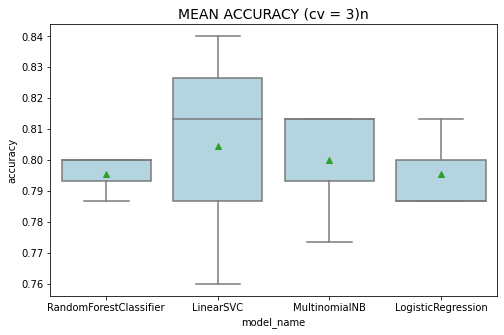

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 3)n", size=14);

# Using LinearSVC model (most efficient)

In [28]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df.index, test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)
model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

# example prediction

In [30]:
sms='rs 1000 deducted by zomato'
print(model.predict(fitted_vectorizer.transform([sms])))

['online food']
